In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

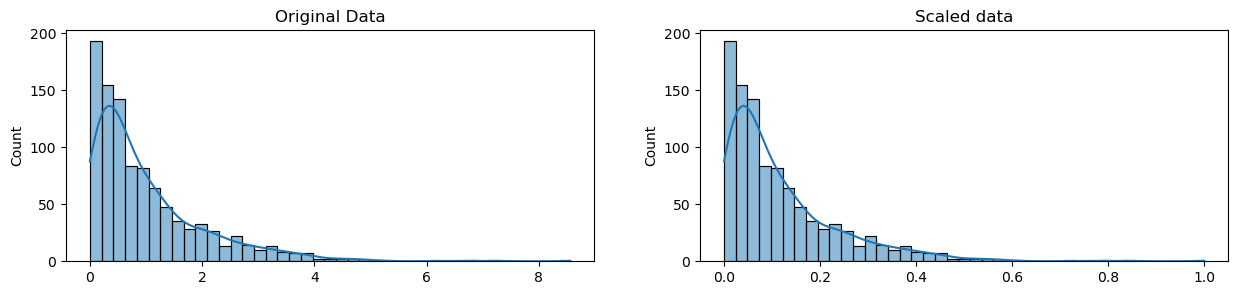

In [2]:
original_data = np.random.exponential(size=1000)


scaled_data = minmax_scaling(original_data, columns=[0])


fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

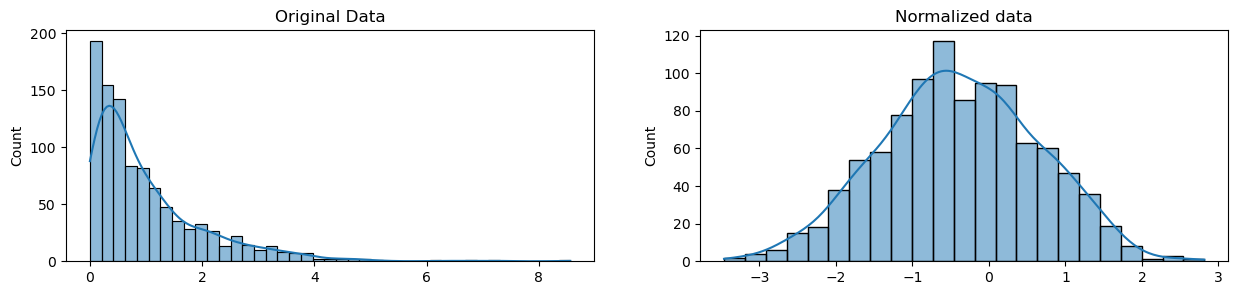

In [3]:
normalized_data = stats.boxcox(original_data)


fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [4]:
kickstarters_2017 = pd.read_csv('./ks-projects-201801.csv')
kickstarters_2017

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [6]:
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

In [7]:
print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


In [10]:
original_goal_data = pd.DataFrame(kickstarters_2017.goal)
original_goal_data

,goal
0,1000.0
1,30000.0
2,45000.0
3,5000.0
4,19500.0
...,...
378656,50000.0
378657,1500.0
378658,15000.0
378659,15000.0


In [11]:
scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])

In [14]:
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

positive_pledges

1          2421.0
2           220.0
3             1.0
4          1283.0
5         52375.0
           ...   
378656       25.0
378657      155.0
378658       20.0
378659      200.0
378660      524.0
Name: usd_pledged_real, Length: 326134, dtype: float64

In [20]:
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], name='uds_pleged_real', index=positive_pledges.index)

In [21]:
print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: uds_pleged_real, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361


In [35]:
positive_pledged = kickstarters_2017.pledged > 0

In [37]:
positive_pledged_only = kickstarters_2017.pledged.loc[positive_pledged]

In [40]:
normalized_values = pd.Series(stats.boxcox(positive_pledged_only)[0], name='pledged', index=positive_pledged_only.index)

Text(0.5, 1.0, 'Normalized data')

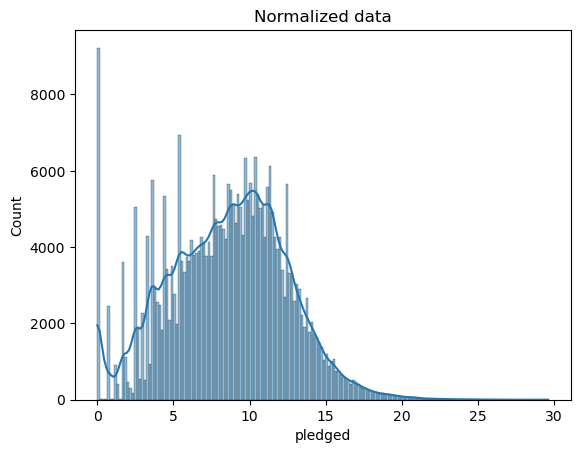

In [41]:
ax = sns.histplot(normalized_values, kde=True)
ax.set_title("Normalized data")

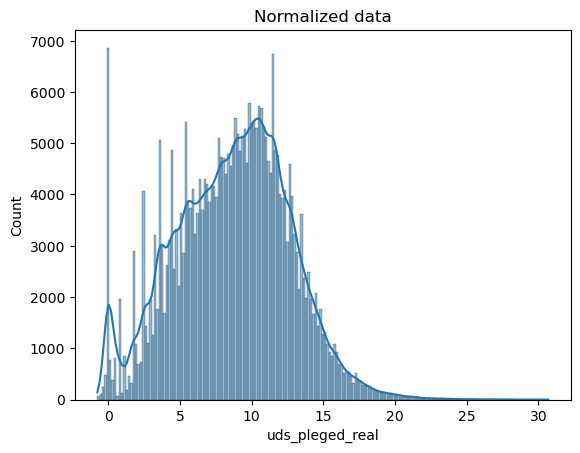

In [42]:

ax = sns.histplot(normalized_pledges, kde=True)
ax.set_title("Normalized data")
plt.show()